## Import

In [41]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 초등 학생별 수준 군집화

In [43]:
%cd /content/drive/MyDrive/강의자료/머신러닝기초/4일차_차원축소와군집화

[WinError 3] 지정된 경로를 찾을 수 없습니다: '/content/drive/MyDrive/강의자료/머신러닝기초/4일차_차원축소와군집화'
c:\Users\JHS\Documents\study\chunjae\8월\5주차(박나연 강사님)머신러닝 이해와 실습\31일_목요일


In [44]:
middle1_score_df = pd.read_csv('./datasets/중1_밀크T중학_AI진단평가_개인별전과목점수.csv',index_col=0)

In [45]:
middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna() # 결측치 제거

,국어,영어,수학,과학,사회,역사
3,68.0,86.0,57.0,15.0,53.0,45.0
10,79.0,93.0,46.0,30.0,45.0,15.0
13,93.0,100.0,48.0,56.0,63.0,100.0
23,100.0,100.0,88.0,61.0,90.0,33.0
32,93.0,100.0,65.0,53.0,45.0,90.0
...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0
2014,65.0,58.0,63.0,0.0,0.0,0.0
2349,54.0,79.0,51.0,90.0,90.0,71.0
3165,47.0,93.0,55.0,30.0,100.0,71.0


In [46]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

In [47]:
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(input_data)

input_data['gmm_cluster'] = gmm_labels

In [48]:
input_data

,국어,영어,수학,과학,사회,역사,gmm_cluster
3,68.0,86.0,57.0,15.0,53.0,45.0,2
10,79.0,93.0,46.0,30.0,45.0,15.0,2
13,93.0,100.0,48.0,56.0,63.0,100.0,2
23,100.0,100.0,88.0,61.0,90.0,33.0,1
32,93.0,100.0,65.0,53.0,45.0,90.0,2
...,...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0,1
2014,65.0,58.0,63.0,0.0,0.0,0.0,0
2349,54.0,79.0,51.0,90.0,90.0,71.0,2
3165,47.0,93.0,55.0,30.0,100.0,71.0,2


### 결과 과목별 시각화

In [49]:
def ploting_score(df):
    f, ax = plt.subplots(2,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0,0])
    ax[0,0].set_title('Korean')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[0,1])
    ax[0,1].set_title('Math')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['영어'].tolist(),
                color="tomato",ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['영어'].tolist(),
                color="mediumorchid", ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['영어'].tolist(),
                color="gold", ax = ax[0,2])
    ax[0,2].set_title('English')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['사회'].tolist(),
                color="tomato", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['사회'].tolist(),
                color="mediumorchid", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['사회'].tolist(),
                color="gold", ax = ax[1,0])
    ax[1,0].set_title('Social')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['과학'].tolist(),
                color="tomato", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['과학'].tolist(),
                color="mediumorchid", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['과학'].tolist(),
                color="gold", ax = ax[1,1])
    ax[1,1].set_title('Science')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['역사'].tolist(),
                color="tomato", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['역사'].tolist(),
                color="mediumorchid", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['역사'].tolist(),
                color="gold", ax = ax[1,2])
    ax[1,2].set_title('History')
    ax[1,2].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

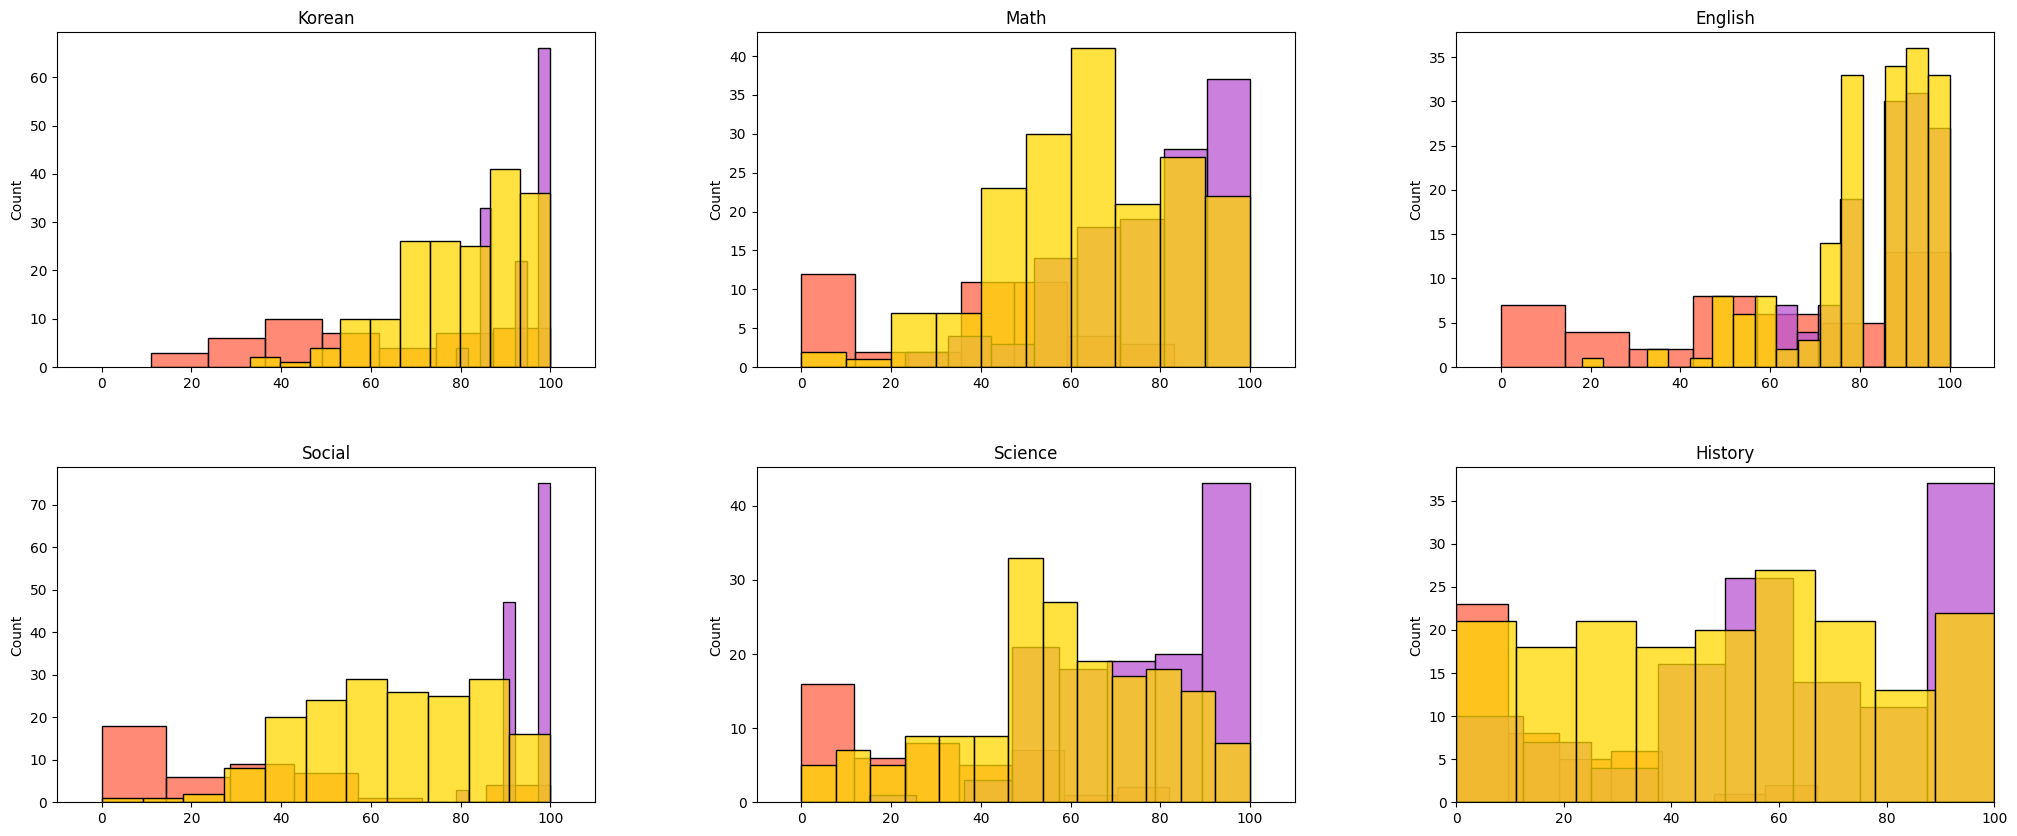

In [50]:
ploting_score(input_data)

#### 1. PCA 진행하지 않고, GMM 적용해보기(결과만 시각화)

In [51]:
middle1_score_df = pd.read_csv('./datasets/중1_밀크T중학_AI진단평가_개인별전과목점수.csv',index_col=0)

In [52]:
input_data = middle1_score_df[['국어','영어','수학','과학','사회','역사']].dropna()

In [53]:
input_data

,국어,영어,수학,과학,사회,역사
3,68.0,86.0,57.0,15.0,53.0,45.0
10,79.0,93.0,46.0,30.0,45.0,15.0
13,93.0,100.0,48.0,56.0,63.0,100.0
23,100.0,100.0,88.0,61.0,90.0,33.0
32,93.0,100.0,65.0,53.0,45.0,90.0
...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0
2014,65.0,58.0,63.0,0.0,0.0,0.0
2349,54.0,79.0,51.0,90.0,90.0,71.0
3165,47.0,93.0,55.0,30.0,100.0,71.0


In [54]:
# gmm
gmm = GaussianMixture(n_components=3, random_state = 42)
gmm_labels = gmm.fit_predict(input_data)

input_data['gmm_cluster'] = gmm_labels

In [55]:
input_data

,국어,영어,수학,과학,사회,역사,gmm_cluster
3,68.0,86.0,57.0,15.0,53.0,45.0,2
10,79.0,93.0,46.0,30.0,45.0,15.0,2
13,93.0,100.0,48.0,56.0,63.0,100.0,2
23,100.0,100.0,88.0,61.0,90.0,33.0,1
32,93.0,100.0,65.0,53.0,45.0,90.0,2
...,...,...,...,...,...,...,...
1888,86.0,68.0,94.0,90.0,100.0,79.0,1
2014,65.0,58.0,63.0,0.0,0.0,0.0,0
2349,54.0,79.0,51.0,90.0,90.0,71.0,2
3165,47.0,93.0,55.0,30.0,100.0,71.0,2


In [56]:
def ploting_score(df):
    f, ax = plt.subplots(2,3)
    f.set_size_inches((25,10))

    plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

    ############ 1 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['국어'].tolist(),
                color="tomato", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['국어'].tolist(),
                color="mediumorchid", ax = ax[0,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['국어'].tolist(),
                color="gold", ax = ax[0,0])
    ax[0,0].set_title('Korean')
    ax[0,0].set_xlim([-10,110])

    ############ 2 ###############

    sns.histplot(df[df['gmm_cluster'] == 0]['수학'].tolist(),
                color="tomato", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['수학'].tolist(),
                color="mediumorchid", ax = ax[0,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['수학'].tolist(),
                color="gold", ax = ax[0,1])
    ax[0,1].set_title('Math')
    ax[0,1].set_xlim([-10,110])


    ############ 3 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['영어'].tolist(),
                color="tomato",ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['영어'].tolist(),
                color="mediumorchid", ax = ax[0,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['영어'].tolist(),
                color="gold", ax = ax[0,2])
    ax[0,2].set_title('English')
    ax[0,2].set_xlim([-10,110])

    ############ 4 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['사회'].tolist(),
                color="tomato", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 1]['사회'].tolist(),
                color="mediumorchid", ax = ax[1,0])
    sns.histplot(df[df['gmm_cluster'] == 2]['사회'].tolist(),
                color="gold", ax = ax[1,0])
    ax[1,0].set_title('Social')
    ax[1,0].set_xlim([-10,110])

    ############ 5 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['과학'].tolist(),
                color="tomato", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 1]['과학'].tolist(),
                color="mediumorchid", ax = ax[1,1])
    sns.histplot(df[df['gmm_cluster'] == 2]['과학'].tolist(),
                color="gold", ax = ax[1,1])
    ax[1,1].set_title('Science')
    ax[1,1].set_xlim([-10,110])

    ############ 6 ###############
    sns.histplot(df[df['gmm_cluster'] == 0]['역사'].tolist(),
                color="tomato", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 1]['역사'].tolist(),
                color="mediumorchid", ax = ax[1,2])
    sns.histplot(df[df['gmm_cluster'] == 2]['역사'].tolist(),
                color="gold", ax = ax[1,2])
    ax[1,2].set_title('History')
    ax[1,2].set_xlim([-10,110])

    plt.xlim(0,100)
    plt.show()

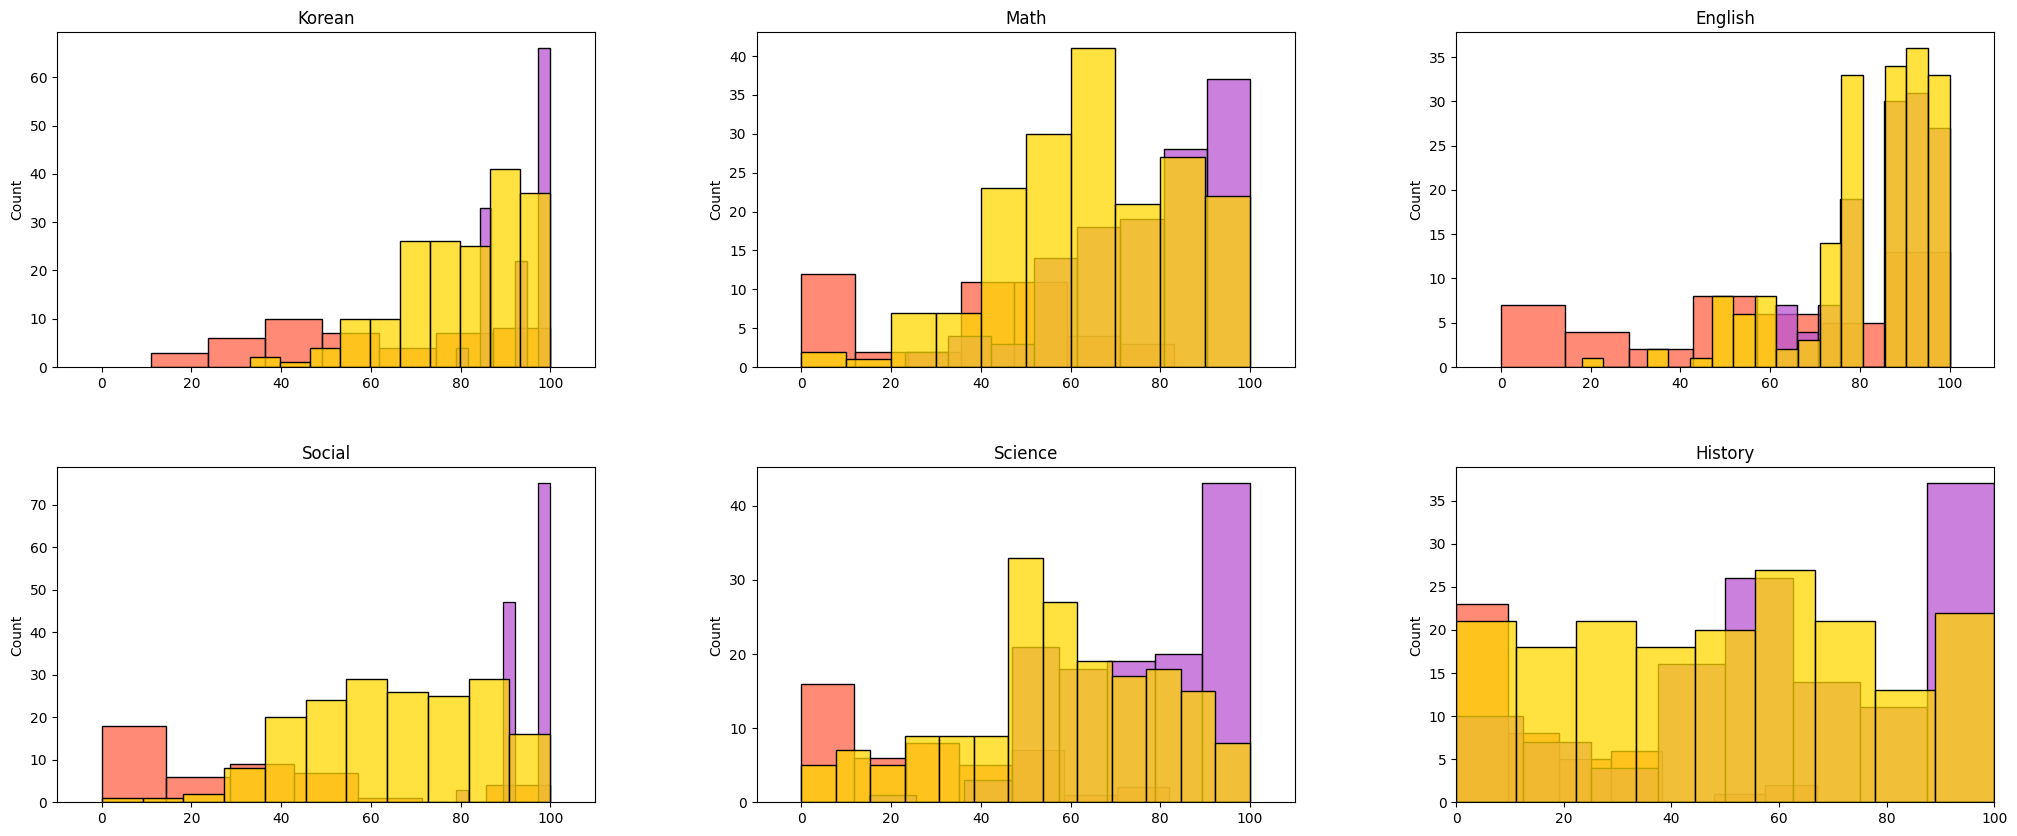

In [57]:
ploting_score(input_data)

#### 2. 국어와 수학과목의 성적이 유사한 사용자끼리 묶이도록 K-means 활용하여 5개의 군집 만들기

In [58]:
## X : 국어 , Y : 수학

In [59]:
from sklearn.cluster import KMeans

# 데이터 프레임에서 2개의 컬럼 데이터를 가져옴
km = input_data[['국어', '수학']]

# K-Means 모델 생성 및 데이터 클러스터링
kmeans = KMeans(n_clusters=5, random_state=42)
km_pred = kmeans.fit_predict(km)

# 클러스터링 결과를 데이터 프레임에 추가
km['군집'] = km_pred

# 클러스터링 결과 분석 또는 시각화 등 수행
# 예시) 각 클러스터의 통계 정보 출력
for cluster_num in range(5):
    cluster_data = km[km['군집'] == cluster_num]
    print(cluster_data.describe())

               국어          수학     군집
count  117.000000  117.000000  117.0
mean    90.683761   67.341880    0.0
std      9.178920    7.309845    0.0
min     68.000000   54.000000    0.0
25%     86.000000   61.000000    0.0
50%     93.000000   68.000000    0.0
75%    100.000000   74.000000    0.0
max    100.000000   77.000000    0.0
               국어         수학    군집
count   15.000000  15.000000  15.0
mean    75.533333   1.533333   1.0
std     20.580388   4.155318   0.0
min     36.000000   0.000000   1.0
25%     63.000000   0.000000   1.0
50%     79.000000   0.000000   1.0
75%     86.000000   0.000000   1.0
max    100.000000  14.000000   1.0
              국어         수학    군집
count  51.000000  51.000000  51.0
mean   49.627451  52.254902   2.0
std    13.558703  12.927247   0.0
min    11.000000  23.000000   2.0
25%    42.000000  46.000000   2.0
50%    54.000000  51.000000   2.0
75%    59.500000  57.500000   2.0
max    68.000000  83.000000   2.0
               국어         수학    군집
count   55.

c:\Users\JHS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\JHS\AppData\Local\Temp\ipykernel_2708\1442498299.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  km['군집'] = km_pred


In [60]:
km_pred

array([2, 3, 3, 4, 0, 0, 0, 2, 2, 3, 3, 4, 0, 4, 0, 1, 0, 0, 3, 0, 4, 4,
       0, 2, 4, 2, 0, 4, 3, 0, 0, 4, 4, 4, 0, 0, 4, 4, 0, 1, 4, 3, 4, 0,
       0, 0, 0, 0, 4, 4, 0, 3, 4, 0, 0, 2, 3, 4, 0, 0, 0, 4, 0, 0, 4, 0,
       4, 4, 0, 4, 4, 4, 2, 0, 0, 0, 4, 4, 4, 3, 4, 0, 0, 2, 3, 0, 4, 4,
       2, 0, 0, 4, 4, 3, 0, 0, 3, 4, 4, 4, 4, 0, 4, 2, 0, 0, 0, 0, 4, 4,
       2, 3, 4, 4, 0, 2, 0, 4, 4, 4, 0, 0, 0, 3, 4, 0, 4, 4, 4, 2, 4, 2,
       3, 0, 0, 0, 2, 3, 2, 0, 2, 4, 4, 4, 0, 0, 4, 3, 4, 0, 4, 4, 3, 2,
       3, 0, 3, 2, 4, 0, 0, 4, 0, 1, 4, 4, 4, 2, 3, 4, 4, 2, 0, 3, 0, 4,
       2, 2, 4, 3, 4, 0, 0, 2, 4, 2, 0, 4, 3, 4, 2, 0, 3, 2, 2, 1, 0, 0,
       2, 2, 4, 4, 4, 0, 4, 0, 0, 0, 0, 2, 0, 4, 0, 0, 4, 0, 4, 4, 4, 4,
       3, 0, 4, 4, 4, 1, 3, 3, 2, 2, 1, 2, 4, 3, 2, 0, 0, 3, 4, 4, 3, 0,
       0, 4, 2, 3, 3, 3, 0, 2, 4, 4, 0, 4, 2, 3, 4, 0, 3, 4, 1, 4, 0, 0,
       4, 2, 0, 4, 2, 3, 0, 3, 3, 0, 0, 3, 3, 1, 4, 2, 3, 2, 4, 2, 3, 4,
       0, 0, 0, 4, 3, 4, 0, 0, 0, 0, 3, 0, 4, 0, 0,

In [61]:
np.unique(km_pred)

array([0, 1, 2, 3, 4])

In [62]:
kmeans.cluster_centers_

array([[90.68376068, 67.34188034],
       [75.53333333,  1.53333333],
       [49.62745098, 52.25490196],
       [87.36363636, 41.23636364],
       [91.68141593, 91.28318584]])

In [63]:
km.reset_index(drop=True, inplace=True) # 인덱스 리셋 

In [64]:
km['군집'].value_counts()

군집
0    117
4    113
3     55
2     51
1     15
Name: count, dtype: int64

c:\Users\JHS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


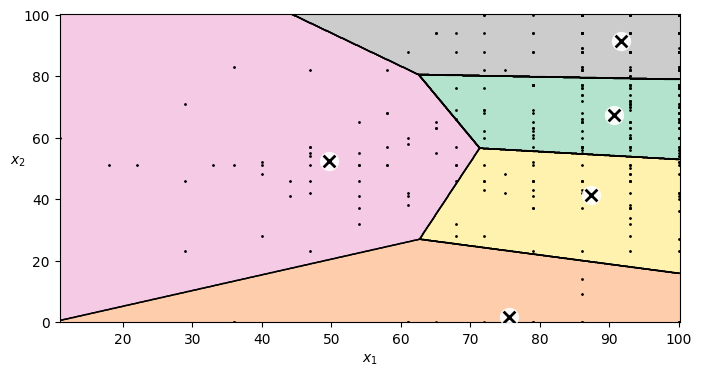

In [65]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    # 바탕 그리기
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")

    # 결정 경계 그리기
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')

    # 훈련 데이터셋과 센트로이드 그리기
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$")
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", rotation=0)
    else:
        plt.tick_params(labelleft=False)


plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, km[['국어', '수학']].values)
plt.show()


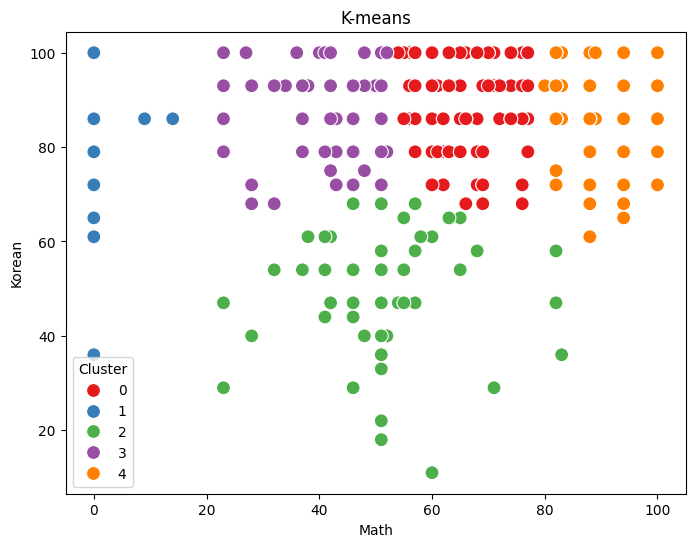

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# 클러스터링 결과를 시각화하기 위해 데이터를 준비
x_values = km['수학']
y_values = km['국어']
cluster_labels = km['군집']

# 그래프 크기 설정
plt.figure(figsize=(8, 6))

# 클러스터 별로 다른 색깔로 데이터 포인트 표시
sns.scatterplot(x=x_values, y=y_values, hue=cluster_labels, palette="Set1", s=100)

# 그래프 제목과 축 레이블 설정
plt.title('K-means')
plt.xlabel('Math')
plt.ylabel('Korean')

# 범례 표시
plt.legend(title='Cluster')

# 그래프 표시
plt.show()


#### 느낀점


pca는 차원을 축소해서 고차원일때 데이터 포인트가 많아 시각화가 어려운 부분을 해결해줄수있다. 

k-mean은  클러스트 크기가 다를때 사용하지 못하기 때문에 항상 사용하는 것은 힘들 것 같다.